In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist

(training_data, training_labels), (testing_data, testing_labels) = mnist.load_data()

training_data = training_data / 255.0
testing_data = testing_data / 255.0

model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(
         128,
         activation = 'relu'
     ),
     tf.keras.layers.Dense(
         64,
         activation = 'relu'
     ),
     tf.keras.layers.Dense(
         32,
         activation = 'relu'
     ),
     tf.keras.layers.Dense(
         10,
         activation = 'softmax'
     )
    ]
)

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

my_model = model.fit(
    training_data,
    training_labels,
    epochs = 15
)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/15
1875/1875 [==============================] - 6s 2ms/step - loss: 1.1434 - accuracy: 0.6491
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.9155
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2219 - accuracy: 0.9360
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1833 - accuracy: 0.9465
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1627 - accuracy: 0.9529
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1423 - accuracy: 0.9578
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1246 - accuracy: 0.9633
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1112 - accuracy: 0.9675
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1023 - accuracy: 0.9704
Epoch 10/15
1875/

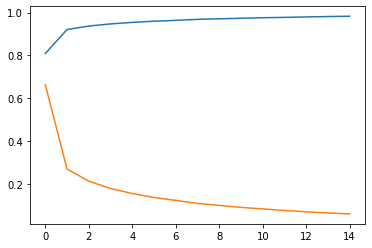

In [2]:
import matplotlib.pyplot as plt

accuracy = my_model.history['accuracy']
loss = my_model.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, loss)
plt.show()

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 128)                 100480    
_________________________________________________________________
dense_1 (Dense)              (32, 64)                  8256      
_________________________________________________________________
dense_2 (Dense)              (32, 32)                  2080      
_________________________________________________________________
dense_3 (Dense)              (32, 10)                  330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.evaluate(testing_data, testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9732


[0.08680283278226852, 0.9732000231742859]

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

uploaded_image = files.upload()

for path in uploaded_image.keys():
  input_image = image.load_img(path, color_mode = 'grayscale', target_size = (28, 28))
  numerical_values_of_image = image.img_to_array(input_image)
  # expand_dimension = numerical_values_of_image.reshape(-1, 28, 28)
  expand_dimension = np.expand_dims(numerical_values_of_image, axis = 0)
  predicted_value = model.predict(expand_dimension)
  argmax_predictions = np.argmax(predicted_value)
  print(argmax_predictions)



Saving Seven.png to Seven (2).png
Saving Three.png to Three (2).png
Saving Zero.png to Zero (4).png
7
3
0
